Mid-Term Project ML ZOOMCAMP

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/clean_dataset.csv")

In [4]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [7]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)
numerical_cols = list(df.select_dtypes(include=['int64','float64']).columns)

In [8]:
numerical_cols

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'ZipCode',
 'Income',
 'Approved']

In [9]:
df.columns = df.columns.str.lower()

In [10]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)
numerical_cols = list(df.select_dtypes(include=['int64','float64']).columns)

In [11]:
numerical_cols

['gender',
 'age',
 'debt',
 'married',
 'bankcustomer',
 'yearsemployed',
 'priordefault',
 'employed',
 'creditscore',
 'driverslicense',
 'zipcode',
 'income',
 'approved']

In [12]:
df.head(5)

,gender,age,debt,married,bankcustomer,industry,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [13]:
## Get unique values
for i in categorical_cols:
    print(f"{i} :",df[i].unique())

industry : ['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']
ethnicity : ['White' 'Black' 'Asian' 'Latino' 'Other']
citizen : ['ByBirth' 'ByOtherMeans' 'Temporary']


In [14]:
df.head()

,gender,age,debt,married,bankcustomer,industry,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [15]:
df['married'].unique()

array([1, 0])

In [16]:
def prepare_df(df):
       df = df.copy()
       df['gender'] = df['gender'].apply(lambda x: 'male' if x == 1 else 'female').astype('object')
       df['married'] = df['married'].apply(lambda x: 'yes' if x == 1 else 'no').astype('object')
       df['bankcustomer'] = df['bankcustomer'].apply(lambda x: 'yes' if x == 1 else 'no').astype('object')
       df['priordefault'] = df['priordefault'].apply(lambda x: 'yes' if x == 1 else 'no').astype('object')
       df['employed'] = df['employed'].apply(lambda x: 'yes' if x == 1 else 'no').astype('object')
       df['driverslicense'] = df['driverslicense'].apply(lambda x: 'yes' if x == 1 else 'no').astype('object')
       df['zipcode'] = df['zipcode'].astype('object')
       return df

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [18]:
df_prep = prepare_df(df)

In [19]:
df_prep

,gender,age,debt,married,bankcustomer,industry,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,approved
0,male,30.83,0.000,yes,yes,Industrials,White,1.25,yes,yes,1,no,ByBirth,202,0,1
1,female,58.67,4.460,yes,yes,Materials,Black,3.04,yes,yes,6,no,ByBirth,43,560,1
2,female,24.50,0.500,yes,yes,Materials,Black,1.50,yes,no,0,no,ByBirth,280,824,1
3,male,27.83,1.540,yes,yes,Industrials,White,3.75,yes,yes,5,yes,ByBirth,100,3,1
4,male,20.17,5.625,yes,yes,Industrials,White,1.71,yes,no,0,no,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,male,21.08,10.085,no,no,Education,Black,1.25,no,no,0,no,ByBirth,260,0,0
686,female,22.67,0.750,yes,yes,Energy,White,2.00,no,yes,2,yes,ByBirth,200,394,0
687,female,25.25,13.500,no,no,Healthcare,Latino,2.00,no,yes,1,yes,ByBirth,200,1,0
688,male,17.92,0.205,yes,yes,ConsumerStaples,White,0.04,no,no,0,no,ByBirth,280,750,0


Text(0.5, 1.0, 'Distribution of Income')

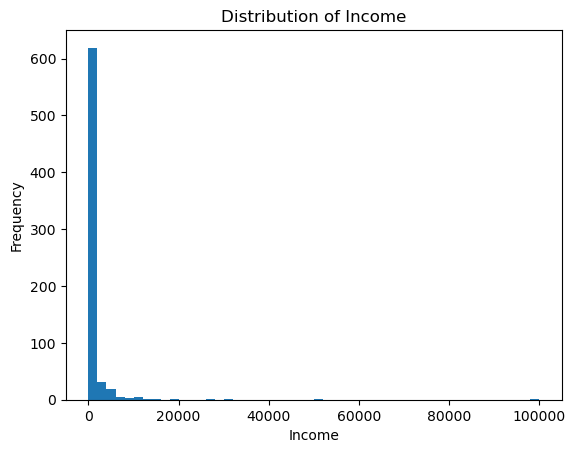

In [21]:
plt.hist(df_prep['income'], bins=50)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

Text(0.5, 1.0, 'Distribution of Employment Duration')

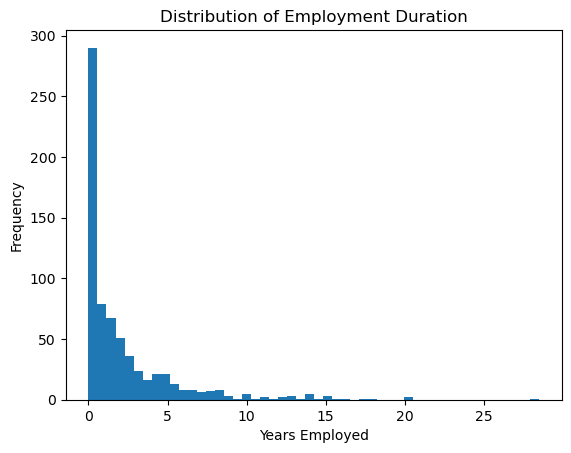

In [22]:
plt.hist(df_prep['yearsemployed'], bins=50)
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Employment Duration')

Text(0.5, 1.0, 'Distribution of age')

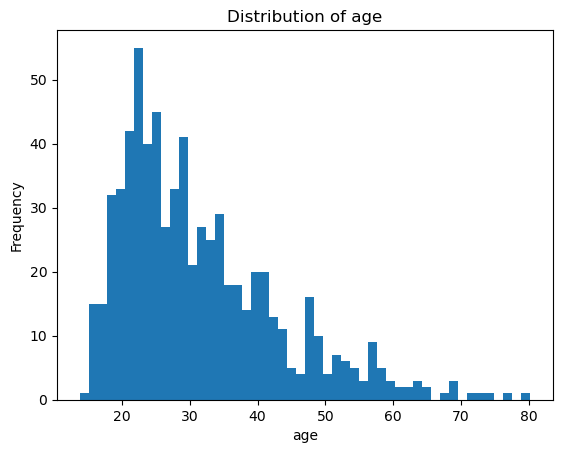

In [23]:
plt.hist(df_prep['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')

In [19]:
df_full_train, df_test = train_test_split(df_prep, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
y_train = df_train.approved.values
y_val = df_val.approved.values
y_test = df_test.approved.values

In [21]:
del df_train['approved']
del df_val['approved']
del df_test['approved']

In [22]:
cat = list(df_prep.select_dtypes(include=['object']).columns)
num = list(df_prep.select_dtypes(include=['int64','float64']).columns)

In [23]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          690 non-null    object 
 1   age             690 non-null    float64
 2   debt            690 non-null    float64
 3   married         690 non-null    object 
 4   bankcustomer    690 non-null    object 
 5   industry        690 non-null    object 
 6   ethnicity       690 non-null    object 
 7   yearsemployed   690 non-null    float64
 8   priordefault    690 non-null    object 
 9   employed        690 non-null    object 
 10  creditscore     690 non-null    int64  
 11  driverslicense  690 non-null    object 
 12  citizen         690 non-null    object 
 13  zipcode         690 non-null    object 
 14  income          690 non-null    int64  
 15  approved        690 non-null    int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 86.4+ KB


In [24]:
df.zipcode.unique()

array([ 202,   43,  280,  100,  120,  360,  164,   80,  180,   52,  128,
        260,    0,  320,  396,   96,  200,  300,  145,  500,  168,  434,
        583,   30,  240,   70,  455,  311,  216,  491,  400,  239,  160,
        711,  250,  520,  515,  420,  980,  443,  140,   94,  368,  288,
        928,  188,  112,  171,  268,  167,   75,  152,  176,  329,  212,
        410,  274,  375,  408,  350,  204,   40,  181,  399,  440,   93,
         60,  395,  393,   21,   29,  102,  431,  370,   24,   20,  129,
        510,  195,  144,  380,   49,   50,  381,  150,  117,   56,  211,
        230,  156,   22,  228,  519,  253,  487,  220,   88,   73,  121,
        470,  136,  132,  292,  154,  272,  340,  108,  720,  450,  232,
        170, 1160,  411,  460,  348,  480,  640,  372,  276,  221,  352,
        141,  178,  600,  550, 2000,  225,  210,  110,  356,   45,   62,
         92,  174,   17,   86,  454,  254,   28,  263,  333,  312,  290,
        371,   99,  252,  760,  560,  130,  523,  6

In [25]:
num

['age', 'debt', 'yearsemployed', 'creditscore', 'income', 'approved']

In [26]:
cat

['gender',
 'married',
 'bankcustomer',
 'industry',
 'ethnicity',
 'priordefault',
 'employed',
 'driverslicense',
 'citizen',
 'zipcode']

In [27]:
num = ['age', 'debt', 'yearsemployed', 'creditscore', 'income']

In [28]:
len(df_prep.columns)

16

In [29]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          690 non-null    object 
 1   age             690 non-null    float64
 2   debt            690 non-null    float64
 3   married         690 non-null    object 
 4   bankcustomer    690 non-null    object 
 5   industry        690 non-null    object 
 6   ethnicity       690 non-null    object 
 7   yearsemployed   690 non-null    float64
 8   priordefault    690 non-null    object 
 9   employed        690 non-null    object 
 10  creditscore     690 non-null    int64  
 11  driverslicense  690 non-null    object 
 12  citizen         690 non-null    object 
 13  zipcode         690 non-null    object 
 14  income          690 non-null    int64  
 15  approved        690 non-null    int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 86.4+ KB


In [30]:
df['priordefault'].min()

0

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [32]:
X_train_num = df_train[num].values

In [33]:
X_train_cat = ohe.fit_transform(df_train[cat].values)

In [34]:
ohe.get_feature_names_out()

array(['x0_female', 'x0_male', 'x1_no', 'x1_yes', 'x2_no', 'x2_yes',
       'x3_CommunicationServices', 'x3_ConsumerDiscretionary',
       'x3_ConsumerStaples', 'x3_Education', 'x3_Energy', 'x3_Financials',
       'x3_Healthcare', 'x3_Industrials', 'x3_InformationTechnology',
       'x3_Materials', 'x3_Real Estate', 'x3_Research', 'x3_Transport',
       'x3_Utilities', 'x4_Asian', 'x4_Black', 'x4_Latino', 'x4_Other',
       'x4_White', 'x5_no', 'x5_yes', 'x6_no', 'x6_yes', 'x7_no',
       'x7_yes', 'x8_ByBirth', 'x8_ByOtherMeans', 'x8_Temporary', 'x9_0',
       'x9_17', 'x9_20', 'x9_21', 'x9_22', 'x9_28', 'x9_29', 'x9_40',
       'x9_49', 'x9_50', 'x9_52', 'x9_60', 'x9_62', 'x9_70', 'x9_80',
       'x9_86', 'x9_88', 'x9_92', 'x9_93', 'x9_94', 'x9_99', 'x9_100',
       'x9_102', 'x9_108', 'x9_110', 'x9_112', 'x9_117', 'x9_120',
       'x9_121', 'x9_128', 'x9_129', 'x9_130', 'x9_132', 'x9_136',
       'x9_140', 'x9_141', 'x9_144', 'x9_145', 'x9_150', 'x9_152',
       'x9_154', 'x9_156', 

In [35]:
from sklearn.preprocessing import StandardScaler
X_train_num = df_train[num].values

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)

In [36]:
X_train_num

array([[ 0.19661885, -0.62969507, -0.60894424, -0.43556877, -0.18104929],
       [-0.92280599, -0.46322076, -0.06284436,  1.62422374,  0.37492631],
       [ 0.25167253, -0.94760083, -0.60894424, -0.43556877, -0.18104929],
       ...,
       [-1.01289383,  0.50654225, -0.59802224, -0.24831491, -0.18086397],
       [-0.92947917, -0.7299808 , -0.19936933, -0.43556877, -0.17975202],
       [ 0.26585302,  2.06097107,  0.85869919,  1.24971601, -0.15621572]],
      shape=(414, 5))

In [37]:
X_train_cat = X_train_cat.toarray()

In [38]:
X_train = np.column_stack([X_train_num, X_train_cat])

In [39]:
X_train

array([[ 0.19661885, -0.62969507, -0.60894424, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92280599, -0.46322076, -0.06284436, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25167253, -0.94760083, -0.60894424, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.01289383,  0.50654225, -0.59802224, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92947917, -0.7299808 , -0.19936933, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26585302,  2.06097107,  0.85869919, ...,  0.        ,
         0.        ,  0.        ]], shape=(414, 166))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
X_val_num = df_val[num].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[cat].values)
X_val_cat = X_val_cat.toarray()
X_val = np.column_stack([X_val_num, X_val_cat])

In [42]:
y_pred = model.predict_proba(X_val)[:, 1]
accuracy_score(y_val, y_pred >= 0.5)

0.8478260869565217

In [43]:
y_full_train = np.concatenate((y_train, y_val), axis=0)
y_full_train

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [56]:
## sample record
import pickle
with open("model_1.bin", 'rb') as f:
    ohe1, scaler1, model1 = pickle.load(f)

sample_record = {
    "gender": "female",
    "age": 35.6,
    "debt": 2.15,
    "married": "yes",
    "bankcustomer": "yes",
    "industry": "Industrials",
    "ethnicity": "White",
    "yearsemployed": 4.2,
    "priordefault": "no",
    "employed": "yes",
    "creditscore": 5,
    "driverslicense": "yes",
    "citizen": "ByBirth",
    "zipcode": 180,
    "income": 2450
}

sample_record_df = pd.DataFrame(sample_record,index=[0])
X_num = sample_record_df[num].values
X_cat = ohe1.transform(sample_record_df[cat].values)
X_num = scaler.transform(X_num)
X_cat = X_cat.toarray()

In [58]:
X = np.column_stack([X_num, X_cat])

In [61]:
pred = model1.predict_proba(X)[:, 1]

In [63]:
pred_val = model1.predict(X)

In [64]:
pred_val

array([0])